In [60]:
#Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
df_house = pd.read_csv('house_train_raw.csv')

In [154]:
df_house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


c:\Users\Nelson\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


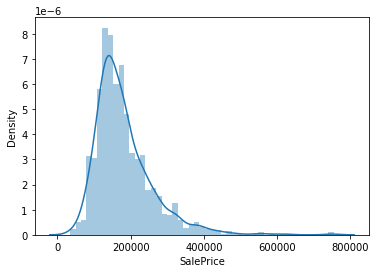

In [268]:
#graficamos el histograma del salerprice
sns.distplot(df_house['SalePrice'])
plt.show()


In [4]:
#Separamos las variables categoricas y las variables numericas
df_house_cat = df_house.select_dtypes(include=['object'])
df_house_num = df_house.select_dtypes(include=['int64','float64'])


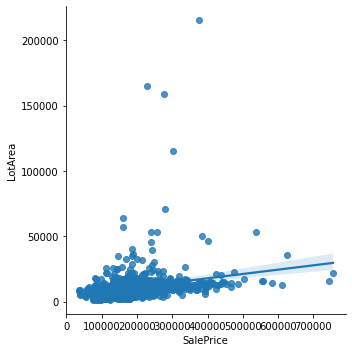

In [269]:
#graficamos la dispersion del salerprice con respecto al area del lote
tips = df_house_num
g = sns.lmplot(x='SalePrice', y='LotArea', data=tips)

In [270]:
#corroboramos las dimensiones del dataframe
df_house_cat.shape

(1460, 43)

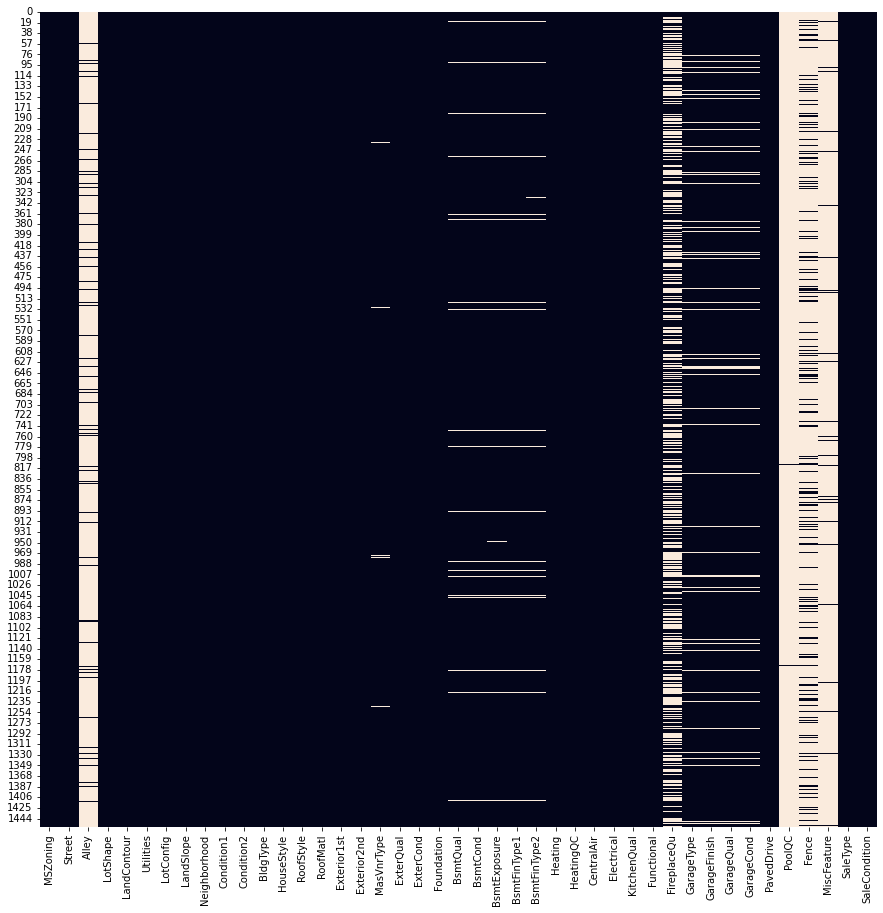

In [170]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

In [5]:
#eliminamos las filas con mayor cantidad de valores nulos
df_house_cat=df_house_cat.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1)

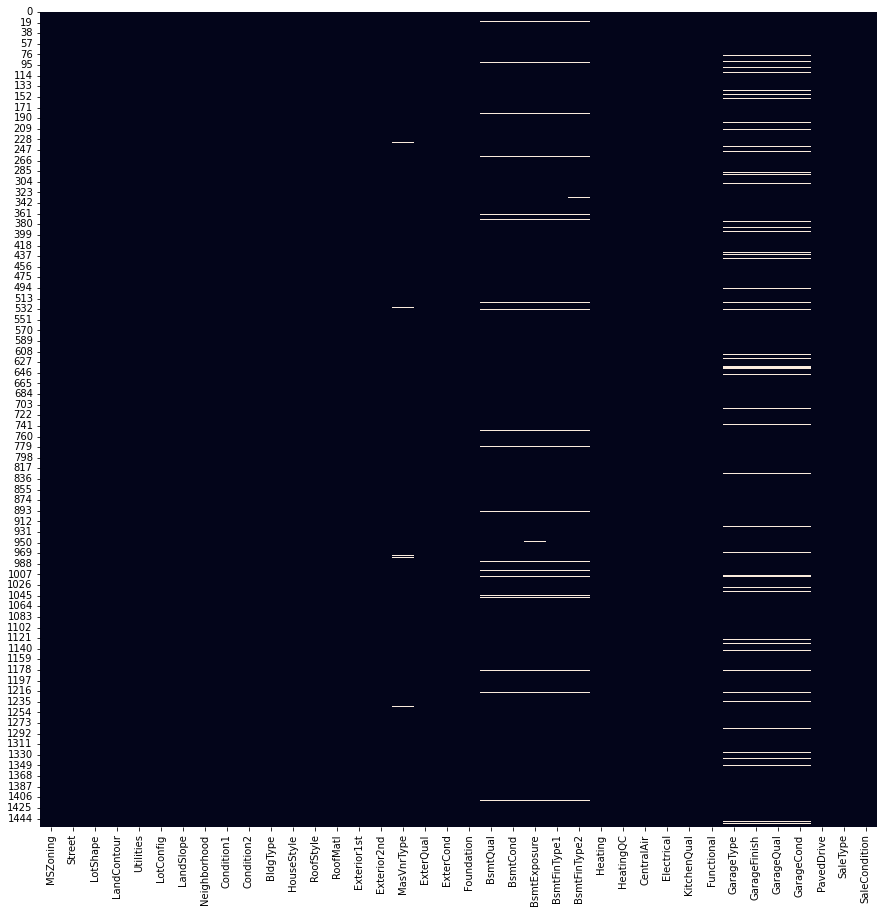

In [6]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

In [ ]:
#corroboramos las dimensiones del dataframe
df_house_cat.shape

In [7]:
#imputamos nan a los valores nulos
df_house_cat=df_house_cat.fillna('None')


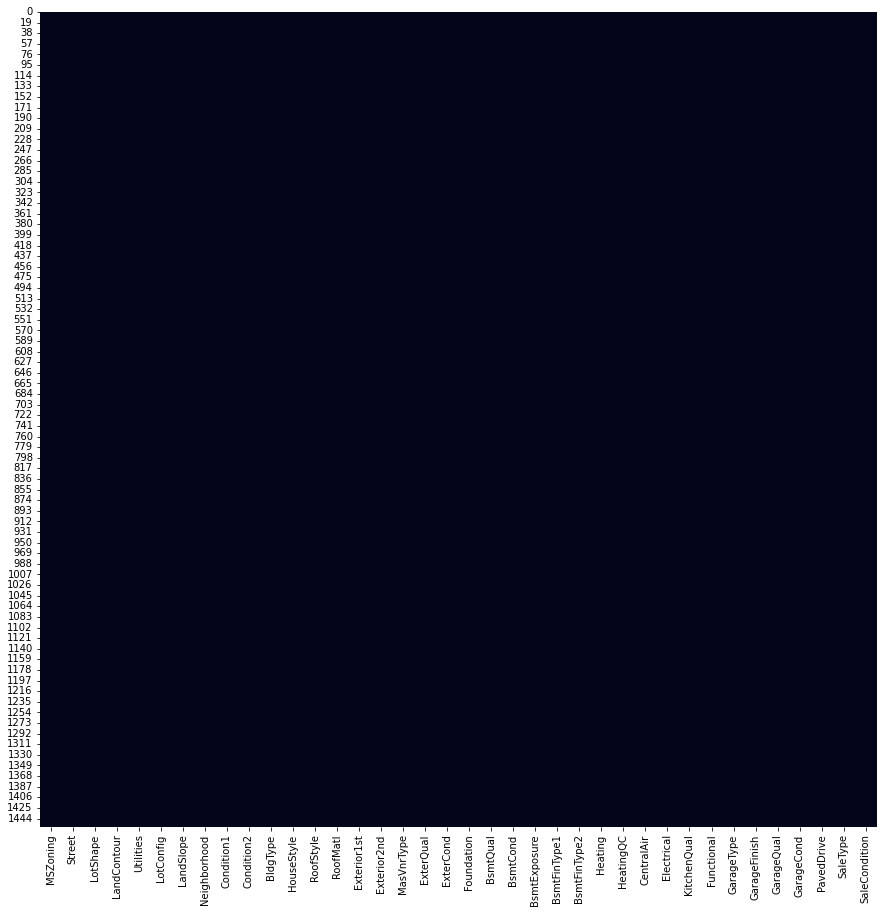

In [8]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

In [204]:
df_house_cat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [272]:
df_house_num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [ ]:
#imputamos los valores medios de las variables numericas
df_house_num.fillna(df_house_num.mean(), inplace=True)
df_house_num.isnull().sum()

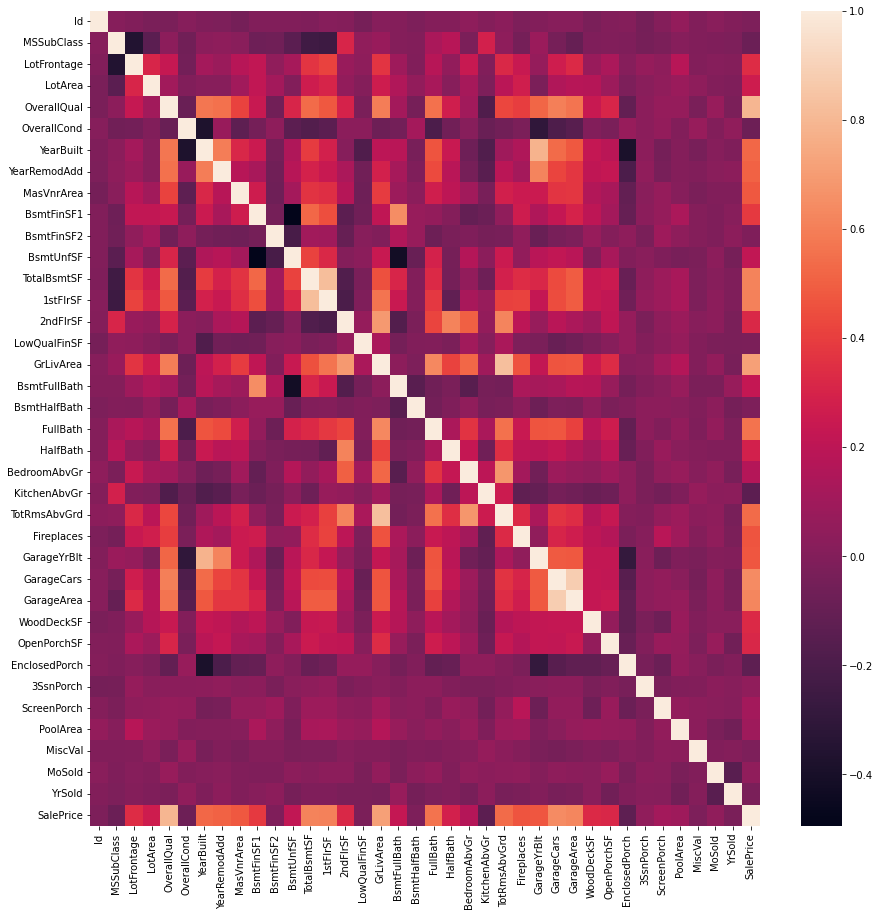

In [10]:
#graficamos el heatmap de la matriz de correlacion
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_num.corr())
plt.show()


In [11]:
#Creamos el dataframe de features que vamos a utilizar y el de target
df_features = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
df_target = df_house_num['SalePrice']

## Probamos el modelo random forest classifier

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#imputamos los valores medios de las variables numericas
df_house_num.fillna(df_house_num.mean(), inplace=True)
df_house_num.isnull().sum()

In [348]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
y = df_house_num['SalePrice']

In [349]:
#creamos los grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [350]:
#instanciamos el modelo y lo entrenamos
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [351]:
#evaluamos el desempeño del modelo en el conjunto de prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9960861056751468
0.0091324200913242


In [352]:
clf.score(X_train,y_train)

0.9960861056751468

In [354]:
RMSLE = mean_squared_log_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.04767088127209417


In [336]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test,  y_test_pred)

26050.310502283104

#### Podemos ver que el accuracy_score es alto para el conjunto de entrenamiento pero bajo para el conjunto de testeo, eso podria indicar que el modelo esta en overfitting.

## Probamos el modelo Random Forest Regressor

In [23]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
y = df_house_num['SalePrice']

In [37]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

In [38]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8644569973832898


In [40]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)

In [41]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.16811769535265947


In [42]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

20527.80289954338

In [43]:
RMSE=mean_squared_error(y_test, y_pred, squared=False)
print('Error medio: ', RMSE) 

Error medio:  32243.744279655002


C:\Users\Nelson\AppData\Local\Temp\ipykernel_17328\369400559.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


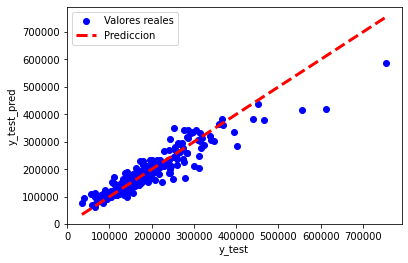

In [59]:
#graficamos el desempeño del modelo
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## Probamos el modelo Lasso de regresion

In [111]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_house_num[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]
y = df_house_num['SalePrice']

In [112]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
#instanciamos el modelo
lasso = Lasso()

In [114]:
#entrenamos el modelo
lasso.fit(X_train, y_train)

c:\Users\Nelson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.026e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [115]:
#Predecimos los valores
predict = lasso.predict(X_test)

In [116]:
lasso.score(X_test, y_test)

0.7952342993480972

In [118]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = lasso.predict(X_test)

In [121]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.08663221064919702


In [120]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

25292.32827228071

## Vamos a trabajar con un dataframe sin nulos y con todas las columnas 


In [12]:
#concatenamos los df sin nulos 
df_house_sin_nulos = pd.concat([df_house_num, df_house_cat], axis=1)

In [14]:
df_house_sin_nulos.shape

(1460, 76)

In [19]:
#eliminamos las varaibles categoricas que no utilizaremos
df_house_sin_nulos = df_house_sin_nulos.drop(['LotShape', 'LandSlope', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish'], axis=1)

In [21]:
df_house_cat.shape

(1460, 38)

In [61]:
df_house_sin_nulos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Ex,Y,SBrkr,Gd,Typ,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Ex,Y,SBrkr,TA,Typ,TA,TA,Y,WD,Normal


In [62]:
#Codificamos las variables categoricas
for col in df_house_sin_nulos.columns:
    if(df_house_sin_nulos[col].dtype == 'object'):
      le=LabelEncoder()
      df_house_sin_nulos[col]=le.fit_transform(df_house_sin_nulos[col])

In [63]:
df_house_sin_nulos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,5,2,6,5,5,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,5,3,6,5,5,2,8,4


In [69]:
#Ordenamos las variables por el grado de correlacion que tienen con el target
cor= df_house_sin_nulos[:].corr()
cor=cor.sort_values(['SalePrice'],ascending=False)


In [ ]:

cor.SalePrice.head(40)

In [123]:
#Tomamos las primeras variables que tienen un grado de correlacion mayor a 1
#y definimos las features que vamos a utilizar y el target
df_house_feat = df_house_sin_nulos[['OverallQual','GarageArea','GarageCars',
'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
'Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath'
,'GarageYrBlt','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF',
'HalfBath','LotArea','CentralAir','GarageCond','Electrical','PavedDrive','BsmtFullBath',
'RoofStyle','BsmtUnfSF','SaleCondition','Neighborhood','GarageQual','HouseStyle',
'BedroomAbvGr','ExterCond','Functional','ScreenPorch','PoolArea']]
df_house_target = df_house_sin_nulos['SalePrice']


In [124]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_house_feat, df_house_target, test_size=0.2, random_state=42)

In [125]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
 0.8644569973832898

In [126]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8891451739336289


In [127]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)

In [128]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.024172938159652067


In [129]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

18348.733002283105

C:\Users\Nelson\AppData\Local\Temp\ipykernel_17328\369400559.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


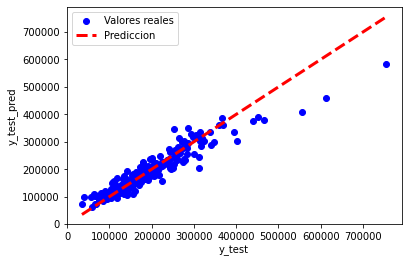

In [130]:
#graficamos el desempeño del modelo
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Probamos el modelo con el dataset de teteso

In [89]:
#cargamos el dataframe de test
df_test =pd.read_csv('houses_test_raw.csv')

In [90]:
#Seleccionamos las columnas que vamos a utilizar para la prediccion
df_test_res = df_test[['OverallQual','GarageArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageCars','Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','FullBath']]

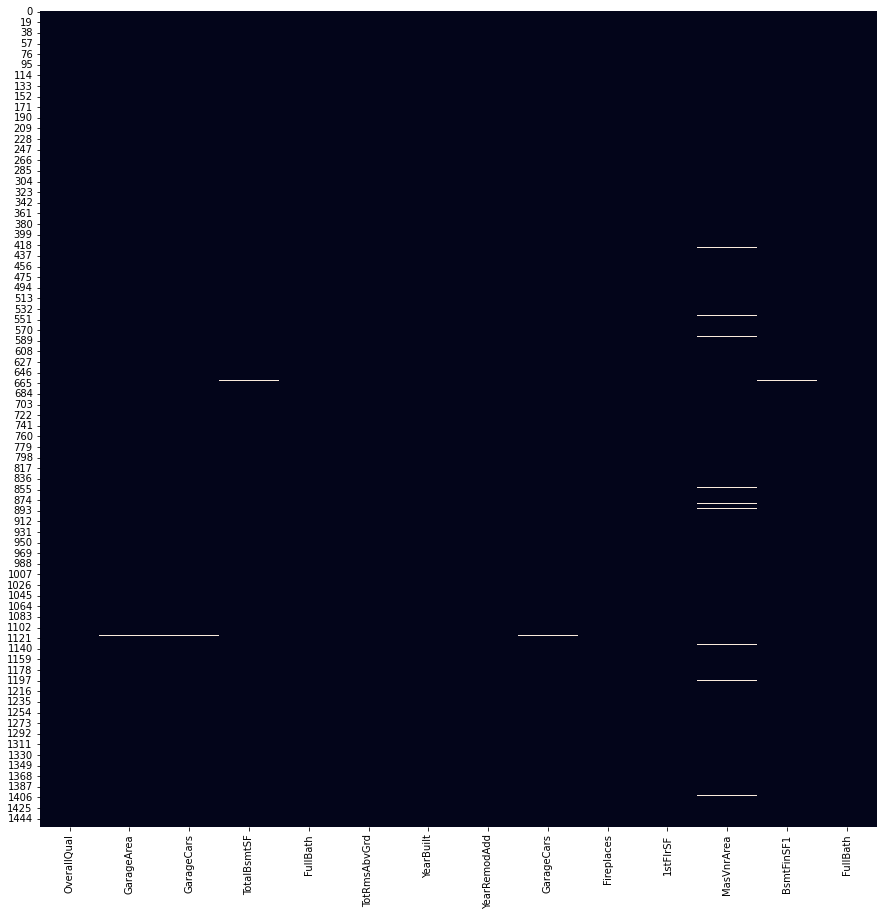

In [91]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_test_res.isnull(), cbar=False)
plt.show()

In [ ]:
#imputamos los valores medios de las variables numericas
df_test_res.fillna(df_test_res.mean(), inplace=True)
df_test_res.isnull().sum()

In [93]:
#obtenemos los valores predicho
df_resultado = model.predict(df_test_res)


In [94]:
df_resultado

array([120078.64, 148613.5 , 159252.56, ..., 170564.36, 118210.23,
       237379.56])

## Vamos a trabajar con el dataframe categorico

In [273]:
df_house_cat.head(2)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<AxesSubplot:>

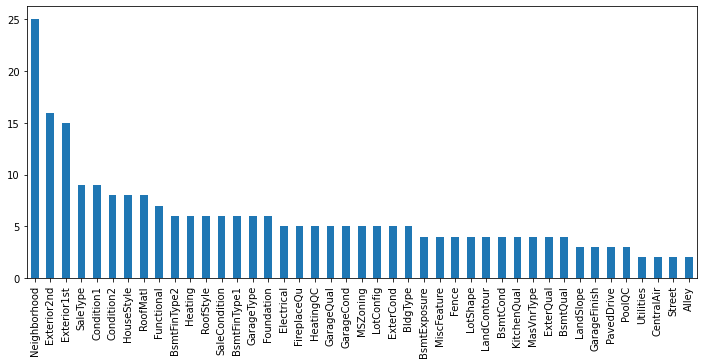

In [274]:
df_house_cat.nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [220]:
from sklearn.ensemble import BaggingClassifier
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

In [225]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), bootstrap_features=False, n_estimators= 200, n_jobs = -1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9957191780821918
0.003424657534246575


In [275]:
clf.score(X_test, y_test)

0.003424657534246575

In [276]:
df_house_cat.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [282]:
import keras
keras.__version__

'2.9.0'

In [288]:
df_house.shape

(1460, 81)

In [301]:
#creamos dos dataframes para guardar los datos de entrenamiento y testeo
df_train = df_house[:1000]
df_test = df_house[1000:]

In [302]:
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [303]:
(train_data, train_targets), (test_data, test_targets) =  (df_train, df_train['SalePrice']) , (df_test,df_test['SalePrice'])

In [304]:
train_data.shape

(1000, 81)

In [305]:
test_data.shape

(460, 81)

In [309]:
train_targets

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

In [310]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

C:\Users\Nelson\AppData\Local\Temp\ipykernel_13080\840430775.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = train_data.mean(axis=0)


In [311]:
from keras import models
from keras import layers

In [312]:
#construimos el modelo
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    red = models.Sequential()
    red.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    red.add(layers.Dense(64, activation='relu'))
    red.add(layers.Dense(1))
    red.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return red

In [314]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    red = build_model()
    # Train the model (in silent mode, verbose=0)
    red.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = red.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).